## Mini Project 4: Customer Churn Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Gcolab/Mini Project')

In [ ]:
!ls

customer_churn_data.csv


# Churn Analysis (Data Science Project)

# 1. Import relevant libraries

In [ ]:
# Step 1: Import relevant libraries---------------------------------------------------------

#Standard libraries for data analysis:----------------------

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew


# sklearn modules for data preprocessing-------------------------------------

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#sklearn modules for Model Selection--------------------------------------

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost as xgb

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


#sklearn modules for Model Evaluation & Improvement---------------------------

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, fbeta_score, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score, GridSearchCV, ShuffleSplit, KFold
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier


#Standard libraries for data visualization---------------------

import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
#Miscellaneous Utilitiy Libraries--------------------------------------


# 2. Import Dataset

In [ ]:
# Step 2: Import the dataset
data = pd.read_csv('customer_churn_data.csv')

#Step 3: Read Dataset
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# 3. EDA

In [ ]:
# Step 4: Evaluate data shape
data.shape

(7043, 21)

In [ ]:
#Check Unique Values
df_columns = data.columns.tolist()
for col in df_columns:
  print(col, "Unique Values: ", data[col].unique())

customerID Unique Values:  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender Unique Values:  ['Female' 'Male']
SeniorCitizen Unique Values:  [0 1]
Partner Unique Values:  ['Yes' 'No']
Dependents Unique Values:  ['No' 'Yes']
tenure Unique Values:  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService Unique Values:  ['No' 'Yes']
MultipleLines Unique Values:  ['No phone service' 'No' 'Yes']
InternetService Unique Values:  ['DSL' 'Fiber optic' 'No']
OnlineSecurity Unique Values:  ['No' 'Yes' 'No internet service']
OnlineBackup Unique Values:  ['Yes' 'No' 'No internet service']
DeviceProtection Unique Values:  ['No' 'Yes' 'No internet service']
TechSupport Unique Values:  ['No' 'Yes' 'No internet service']
StreamingTV Unique Values:  ['No' 'Yes' 'No internet service']


In [ ]:
unique_counts_per_column = data.nunique()

print(unique_counts_per_column)

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
#Recheck Column Datatypes and Missing Values:
null_col = [column for column in data.columns if data[column].isnull().sum()>1]
null_col

[]

In [ ]:
data_null = data[data["tenure"]==0]
data_null

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
#Percentage
print(round(data_null["TotalCharges"].count()/data["TotalCharges"].count(),4)*100,"%")

0.16 %




*   Terdapat 11 Row dengan TotalCharges Kosong
*   Seluruh Missing Values memiliki Tenure 0
*  Missing values hanya 0.16% daripada total jumlah data, sehingga bisa kita drop


In [ ]:
# Handle WhiteSpace in column TotalCharges with NaN value
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)

In [ ]:
# Change TotalCharges Column data type
data['TotalCharges'] = data['TotalCharges'].astype('float64')

In [ ]:
data[data["tenure"]==0].reset_index(drop=True)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
1,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
2,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
3,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
4,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
5,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
6,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
7,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
8,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
9,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
#Convert to NaN because not detected by Python (From Whitespace)
data[data["TotalCharges"] == " "] = np.nan

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

# 4. Check Target Variables

In [ ]:
#Step 5: Check Target Variable Distribution -----------------------------------------------
data["Churn"].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

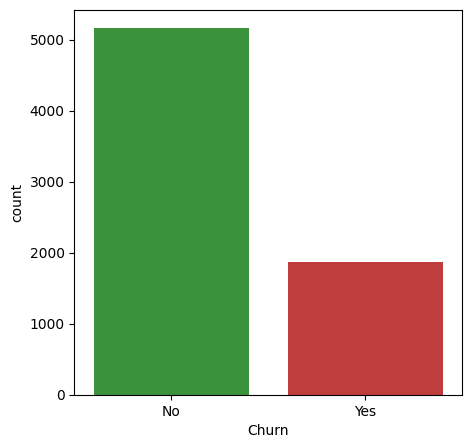

In [ ]:
import seaborn as sns
plt.figure(figsize=(5,5))

palette = sns.color_palette("tab10")[2:4]
sns.countplot(x = data["Churn"], hue = data["Churn"], palette=palette)
plt.show

# 5. Analysis Predictor Columns

## 1. Customer Info Analysis

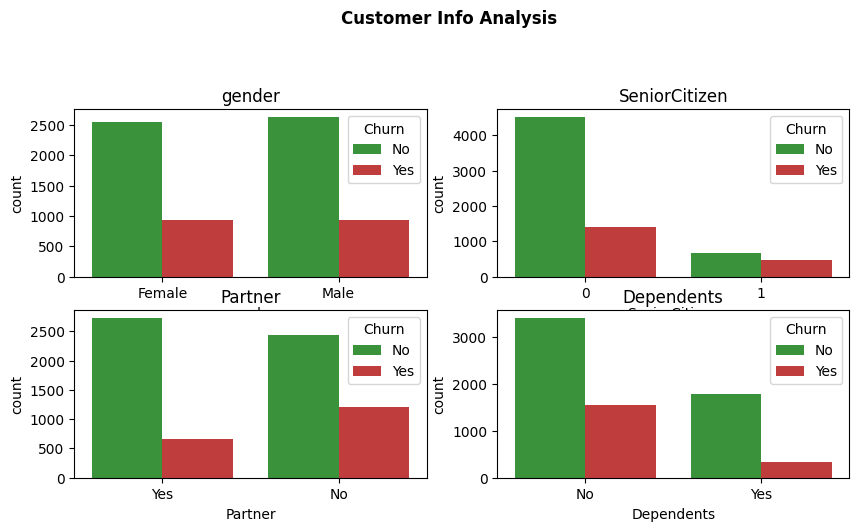

In [ ]:
df_check = data[["gender", "SeniorCitizen", "Partner", "Dependents"]]
fig = plt.figure(figsize=(10,10))
plt.suptitle("Customer Info Analysis", horizontalalignment="center", fontweight="bold")
for i in range(df_check.shape[1]):
  plt.subplot(4, 2, i+1)
  f = sns.countplot(df_check, x = df_check.columns[i], hue= data["Churn"], palette = palette)
  f.set_title(df_check.columns.values[i])

plt.show()



*   Tidak ada perbedaan signifikan antara Gender untuk pelanggan yang churning
*   Pelanggan Churning secara quantity atau jumlah lebih banyak anak Muda, namun secara komposisi lebih banyak Senior Citizen
*   Customer Yang tidak memiliki partner dan anak cenderung lebih banyak churn





## 2. Service Analysis

In [ ]:
# Convert NO Phone Service, No internet service jadi No
data['MultipleLines'] = data['MultipleLines'].replace('No phone service', 'No')
data['OnlineSecurity'] = data['OnlineSecurity'].replace('No internet service', 'No')
data['OnlineBackup'] = data['OnlineBackup'].replace('No internet service', 'No')
data['DeviceProtection'] = data['DeviceProtection'].replace('No internet service', 'No')
data['TechSupport'] = data['TechSupport'].replace('No internet service', 'No')
data['StreamingTV'] = data['StreamingTV'].replace('No internet service', 'No')
data['StreamingMovies'] = data['StreamingMovies'].replace('No internet service', 'No')

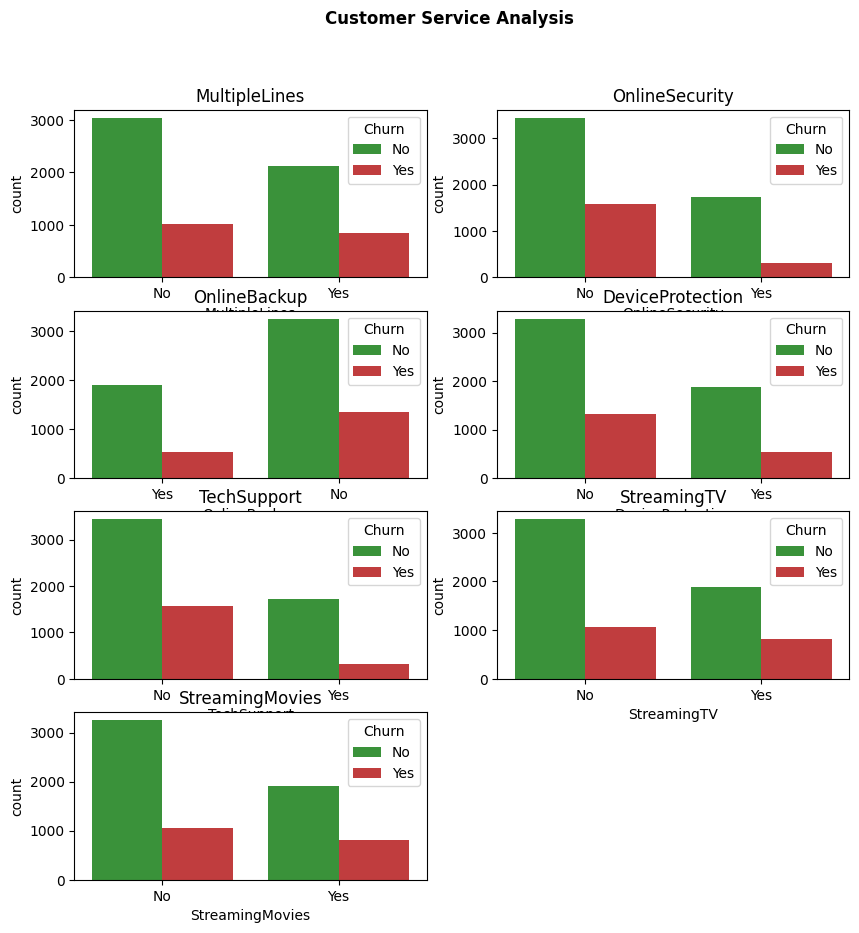

In [ ]:
df_check = data[["MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]]
fig = plt.figure(figsize=(10,10))
plt.suptitle("Customer Service Analysis", horizontalalignment="center", fontweight="bold")
for i in range(df_check.shape[1]):
  plt.subplot(4, 2, i+1)
  f = sns.countplot(df_check, x = df_check.columns[i], hue= data["Churn"], palette = palette)
  f.set_title(df_check.columns.values[i])

plt.show()



*   Pelanggan yang tidak banyak mengambil banyak jenis layanan, cenderung lebih banyak churn, saran solusi mungkin bisa di buat model bundling paket kombinasi dari variasi layanan tersedia.



## 3. Payment Analysis

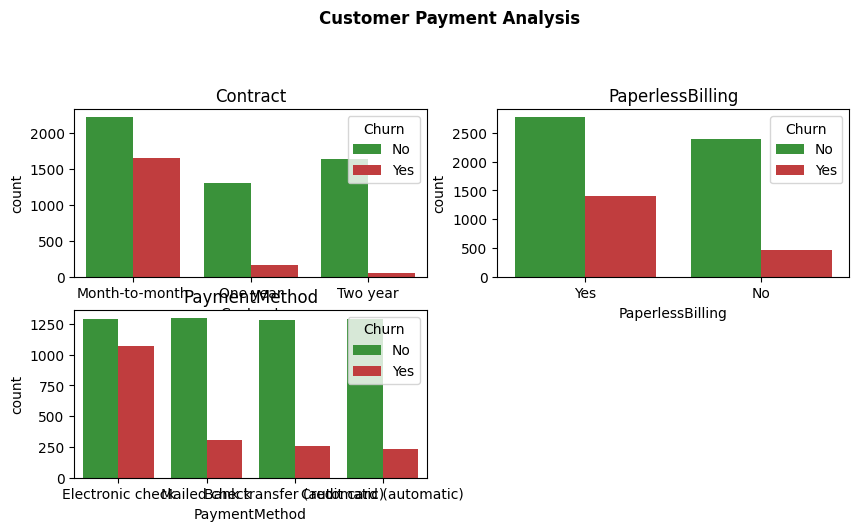

In [ ]:
df_check = data[["Contract", "PaperlessBilling", "PaymentMethod"]]
fig = plt.figure(figsize=(10,10))
plt.suptitle("Customer Payment Analysis", horizontalalignment="center", fontweight="bold")
for i in range(df_check.shape[1]):
  plt.subplot(4, 2, i+1)
  f = sns.countplot(df_check, x = df_check.columns[i], hue= data["Churn"], palette = palette)
  f.set_title(df_check.columns.values[i])

plt.show()



* Yang mengambil kontrak langganan month-to-month memiliki kecenderungan churn lebih besar dibanding per year, bisa jadi pelanggan yang mengambil bulanan awalnya hanya mencoba layanannya atau membandingkan keunggulan service dan price nya.

* Yang menggunakan paperless billing lebih cenderung untuk memilih churn, bisa kemungkinan yang mengambil kontrak month-to-month dan pembayaran Electronic Check yang lebih memilih untuk churn. Tapi tidak terlalu signifikan pengaruhnya.



## 4. Check Outliers

### 4.1 Check dengan histogram untuk melihat distribusi

Text(0.5, 1.0, 'Distribution of Churn')

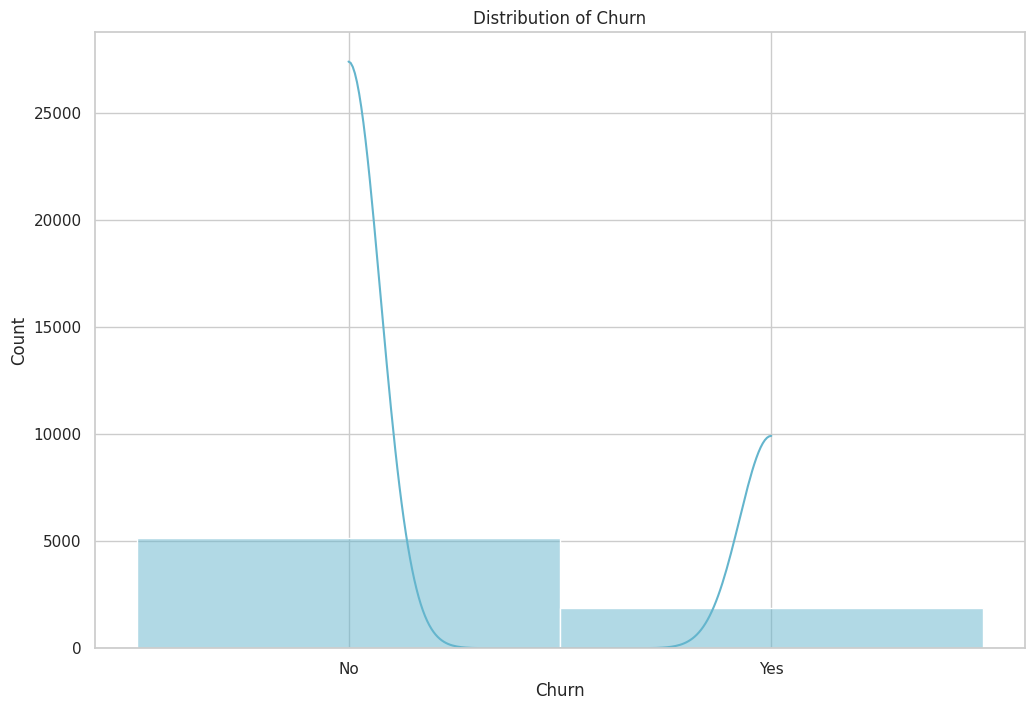

In [ ]:
# Histogram Churn
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(data['Churn'], kde = True, color = 'c')
plt.title('Distribution of Churn')

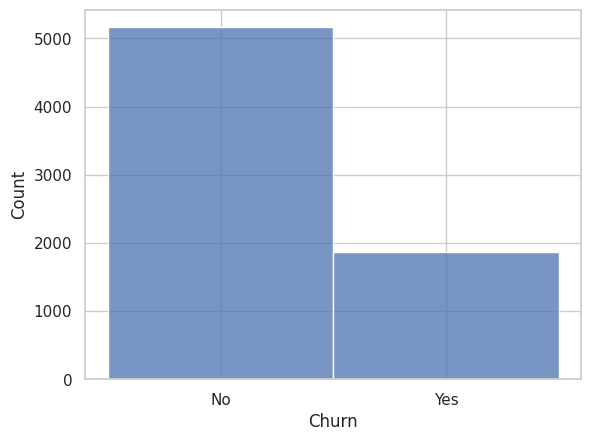

In [ ]:
fig, ax = plt.subplots()
# ax.hist(data.Churn);
sns.histplot(data.Churn, bins=50);

# 6. Feature Engineering

## Label Encoding

In [ ]:
le = []
for col in data.columns[1:]:
  if data[col].dtype == 'object':
    if len(list(data[col].unique())) <= 2:
      le.append(col)

In [ ]:
# le.append('MultipleLines')
# le.append('PhoneService')
# le.append('OnlineSecurity')
# le.append('OnlineBackup')
# le.append('DeviceProtection')
# le.append('TechSupport')
# le.append('StreamingTV')
# le.append('StreamingMovies')

In [ ]:
le

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [ ]:
le.remove('gender')

In [ ]:
def label_encoding(df, features):
  for i in features:
    df[i] = df[i].map({"Yes": 1, "No":0})
  return df

df = label_encoding(data,le)
df["gender"] = data["gender"].map({"Female": 0, "Male": 1})

#Note: No phone service dan no internet service convert ke No semua

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


## One Hot Encoding

In [ ]:
fe2 = ["InternetService", "Contract", "PaymentMethod"]
df_one_hot = pd.get_dummies(df,columns=fe2)

In [ ]:
# Drop CustomerID
df_one_hot = df_one_hot.drop(columns=["customerID"])

In [ ]:
# df_one_hot = df_one_hot.drop(columns=["PhoneService"])

### Mengatasi Imbalance/Outlier Data Churn.
* Karena Tipe data kolom Churn adalah object(Yes,
No) dan tidak dapat dilakukan langsung Apply Natural Log, maka harus dirubah ke Nilai numerik(0,1).
* Apply Natural Log dilakukan setelah proses Encoding.

### Apply Natural Log, untuk mengatasi Outlier karena data imbalance pada kolom Churn.

In [ ]:
data['churn_log'] = np.log10(data['Churn'] + 1)

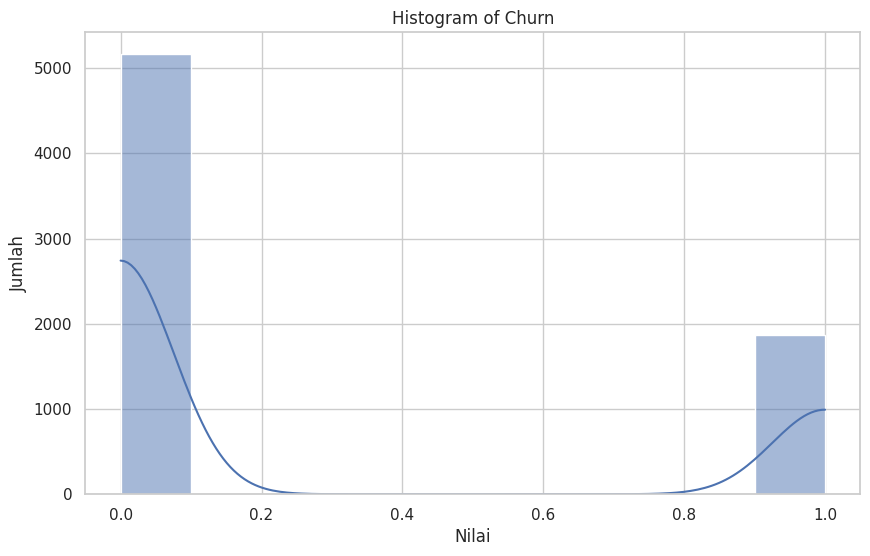

In [ ]:
# Membuat histogram untuk data asli
plt.figure(figsize=(10, 6))
sns.histplot(data['Churn'], bins=10, kde=True)
plt.title('Histogram of Churn')
plt.xlabel('Nilai')
plt.ylabel('Jumlah')
plt.show()

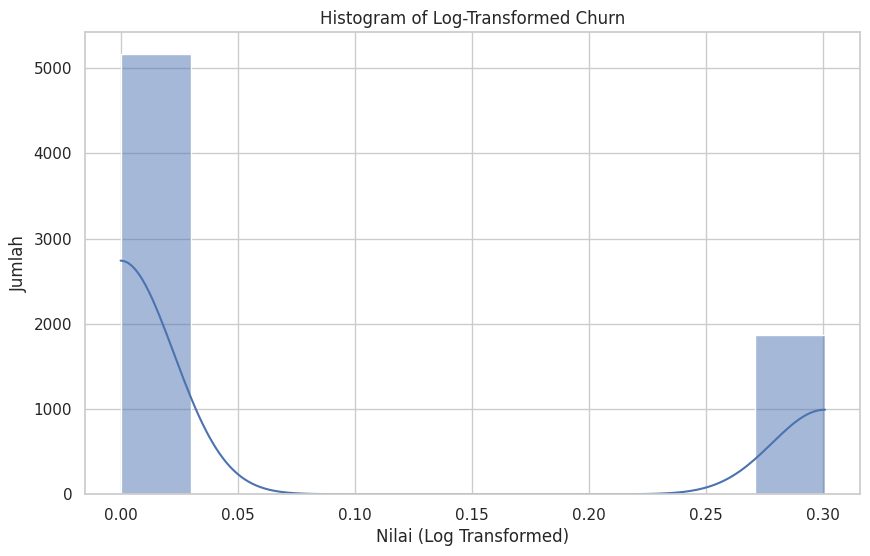

In [ ]:
# Membuat histogram untuk data yang telah ditransformasi
plt.figure(figsize=(10, 6))
sns.histplot(data['churn_log'], bins=10, kde=True)
plt.title('Histogram of Log-Transformed Churn')
plt.xlabel('Nilai (Log Transformed)')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
data["Churn"].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

# 7. Check Correlation

<function matplotlib.pyplot.show(close=None, block=None)>

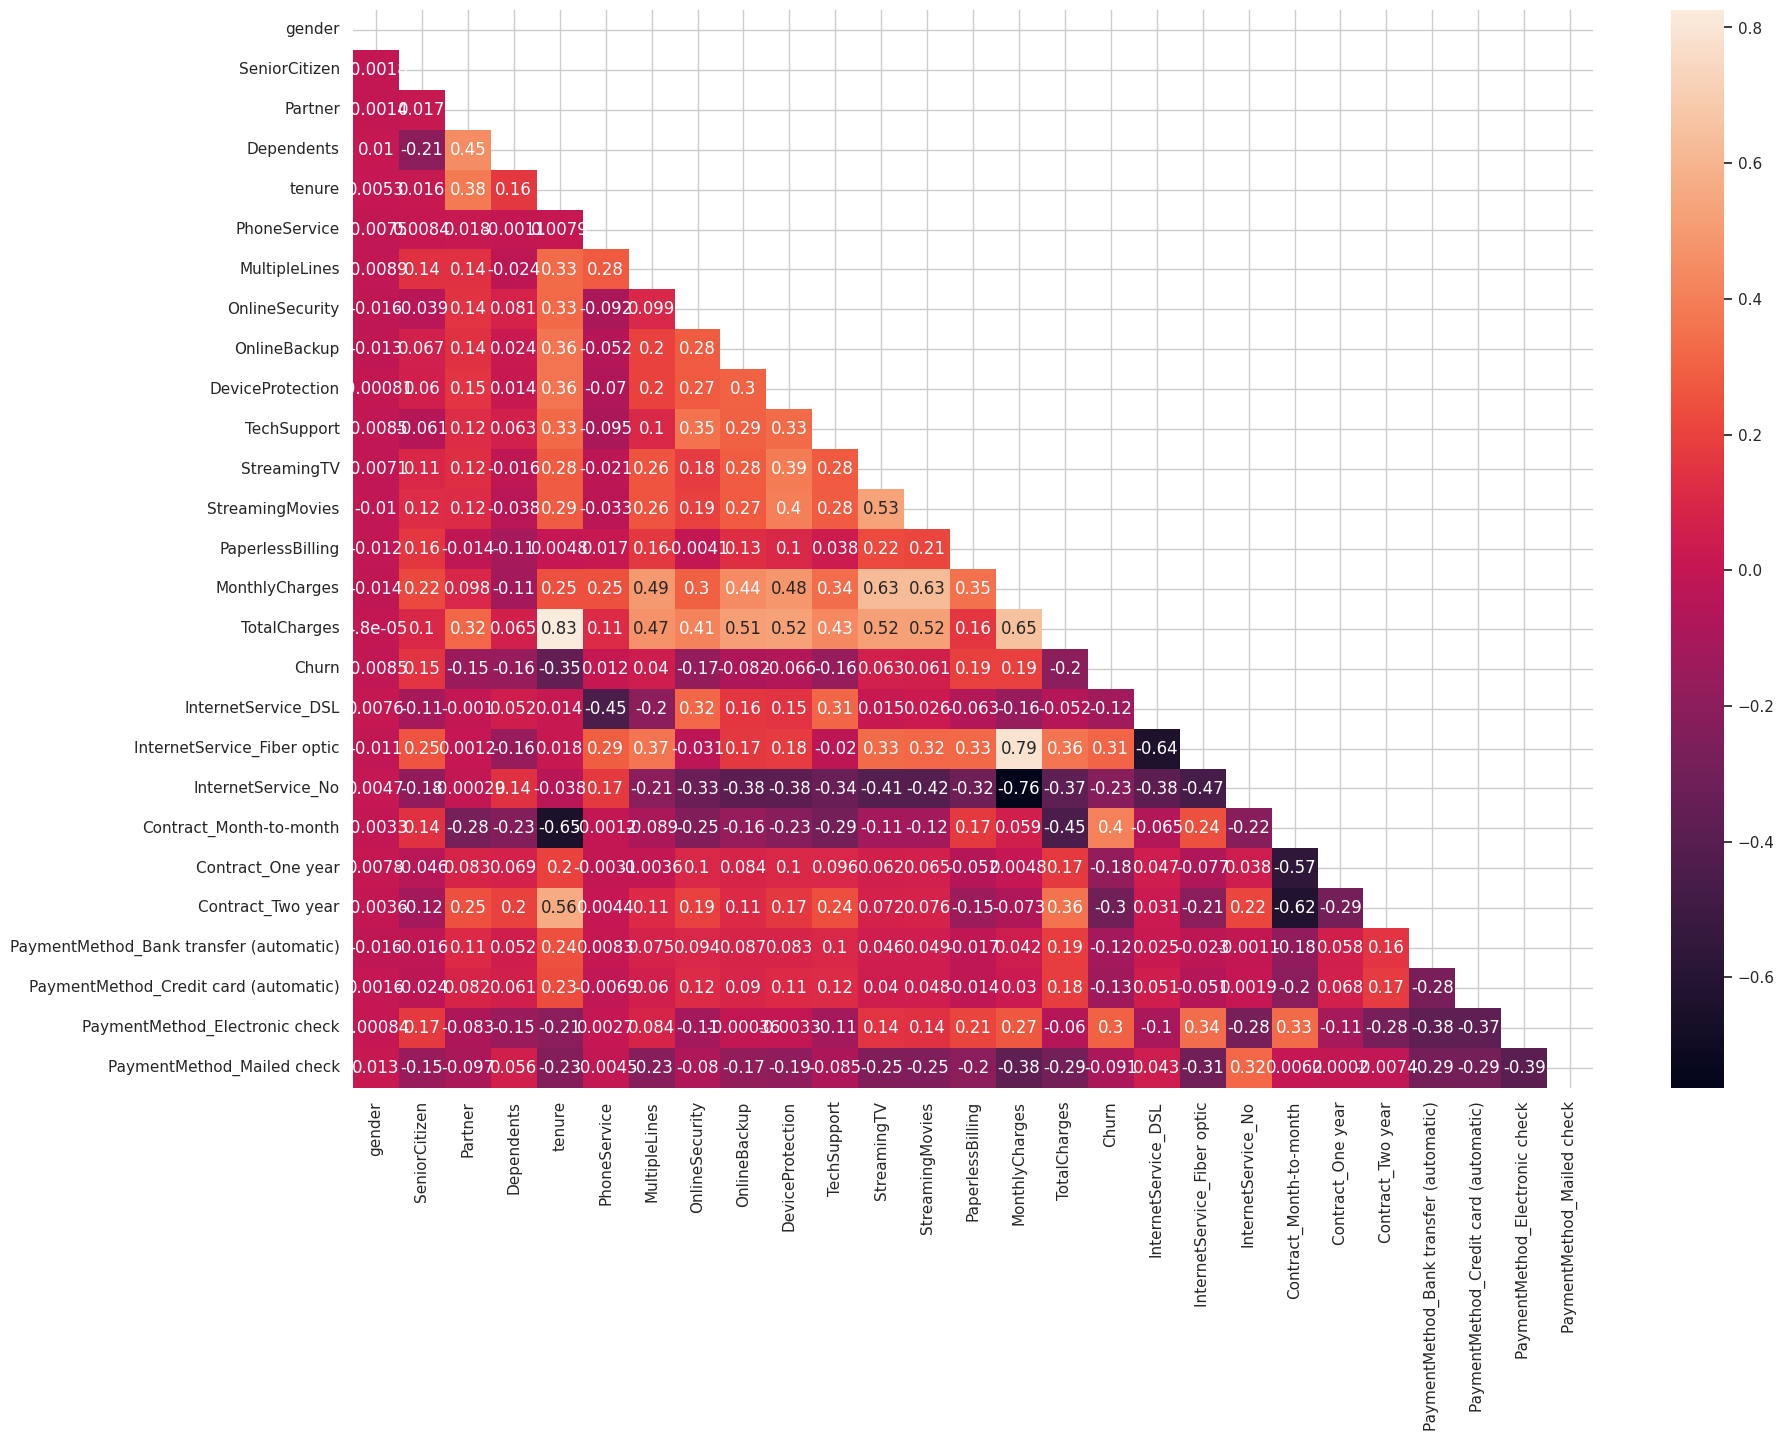

In [ ]:
corr = df_one_hot.corr()
plt.figure(figsize=(20,14))

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot= True, mask=mask)
plt.show

# 8. Split dataset to X dan Y

In [ ]:
X = df_one_hot.drop(columns="Churn") #X atau Prediktor
y = df_one_hot["Churn"] # Y atau target

In [ ]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

# 9. Train - Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 0)

# 10. Feature Scaling

In [ ]:
#Standard Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

Komparasi antara data training dan test

In [ ]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3786,1,0,1,1,27,1,1,0,0,0,0,0,0,1,75.75,1929.00,False,True,False,True,False,False,True,False,False,False
1593,1,0,1,1,4,1,0,0,0,0,0,0,0,0,18.85,84.20,False,False,True,True,False,False,False,False,False,True
2932,1,1,1,0,55,1,1,0,1,1,1,1,1,1,113.60,6292.70,False,True,False,False,False,True,False,False,True,False
198,1,0,1,1,72,1,1,0,1,1,1,1,1,1,112.25,8041.65,False,True,False,False,False,True,True,False,False,False
4512,0,1,0,0,70,1,1,0,1,1,1,1,0,1,75.50,5212.65,True,False,False,False,False,True,True,False,False,False


In [ ]:
X_train_scaled.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.987808,-0.447070,1.033080,1.536953,-0.219204,0.327542,1.180084,-0.632692,-0.732725,-0.726146,-0.639033,-0.790136,-0.805353,0.820130,0.360948,-0.157445,-0.728717,1.128152,-0.520480,0.898298,-0.516892,-0.555377,1.895214,-0.530672,-0.705976,-0.546330
1,0.987808,-0.447070,1.033080,1.536953,-1.158106,0.327542,-0.847397,-0.632692,-0.732725,-0.726146,-0.639033,-0.790136,-0.805353,-1.219318,-1.535042,-0.972422,-0.728717,-0.886405,1.921304,0.898298,-0.516892,-0.555377,-0.527645,-0.530672,-0.705976,1.830396
2,0.987808,2.236784,1.033080,-0.650638,0.923807,0.327542,1.180084,-0.632692,1.364769,1.377134,1.564866,1.265606,1.241692,0.820130,1.622164,1.770307,-0.728717,1.128152,-0.520480,-1.113217,-0.516892,1.800578,-0.527645,-0.530672,1.416479,-0.546330
3,0.987808,-0.447070,1.033080,1.536953,1.617778,0.327542,1.180084,-0.632692,1.364769,1.377134,1.564866,1.265606,1.241692,0.820130,1.577180,2.542941,-0.728717,1.128152,-0.520480,-1.113217,-0.516892,1.800578,1.895214,-0.530672,-0.705976,-0.546330
4,-1.012343,2.236784,-0.967979,-0.650638,1.536134,0.327542,1.180084,-0.632692,1.364769,1.377134,1.564866,1.265606,-0.805353,0.820130,0.352617,1.293173,1.372274,-0.886405,-0.520480,-1.113217,-0.516892,1.800578,1.895214,-0.530672,-0.705976,-0.546330


# 11. Handling Imbalance data using SMOTE

In [ ]:
# Handle imbalance using SMOTE on scaled training data only
smote = SMOTE(sampling_strategy=0.5)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
y_train.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

In [ ]:
y_train_smote.value_counts()

Churn
0    4130
1    2065
Name: count, dtype: int64

# 12. Model Selection

In [ ]:
models = []

models.append(('LogisticRegression', LogisticRegression(solver="liblinear",
                                                        random_state=0,class_weight="balanced")))
models.append(('RandomForest', RandomForestClassifier(n_estimators=100,
                                                      criterion="entropy", random_state=0)))
models.append(('KNN',KNeighborsClassifier()))

models.append(('SVM', SVC(kernel='linear', random_state=0)))

models.append(('NaiveBayes', GaussianNB()))

models.append(('GradientBoosting', GradientBoostingClassifier(n_estimators=100, random_state=0)))

models.append(('DecisionTree', DecisionTreeClassifier(criterion='entropy', random_state=0)))

models.append(('XGBoost', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=0)))

# models.append(('BalancedRandomForest', BalancedRandomForestClassifier(n_estimators=100, random_state=0)))
# #tambahkan model lain

#Evaluation
acc_results = []
auc_results = []
names = []

col = ["Algorithm", "ROC-AUC Mean", "Accuracy Mean"]
model_results = pd.DataFrame(columns=col)

from sklearn import model_selection

i=0
for name, model in models:
  kfold = model_selection.KFold(n_splits=10)
  cv_auc_results = model_selection.cross_val_score(model, X_train_smote, y_train_smote, cv=kfold, scoring="roc_auc")
  cv_acc_results = model_selection.cross_val_score(model, X_train_smote, y_train_smote, cv=kfold, scoring="accuracy")

  auc_results.append(cv_auc_results)
  acc_results.append(cv_acc_results)
  names.append(name)
  model_results.loc[i] = [name, round(cv_auc_results.mean()*100,2),
                         round(cv_acc_results.mean()*100,2)]
  i+=1

# Display model results sorted by ROC-AUC Mean
model_results.sort_values(by=["ROC-AUC Mean"], ascending=False)

,Algorithm,ROC-AUC Mean,Accuracy Mean
1,RandomForest,85.19,79.40
5,GradientBoosting,85.05,78.21
0,LogisticRegression,84.73,75.51
3,SVM,84.37,76.93
7,XGBoost,83.53,77.53
4,NaiveBayes,83.27,74.82
2,KNN,80.72,74.61
6,DecisionTree,68.04,72.75


#Task
Do the exact same modelling process, but with preprocessing : handling imbalance data !

Perbandingkan hasil setelah melalui SMOTE dengan tidak melakukan handling data imbalance